# Mozhdeh Rouhsedaghat
2726554211
rouhseda@usc.edu

In [1]:
from keras.datasets import mnist
from keras.layers import Activation, Dense, Dropout, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.models import Sequential
import keras.losses as losses
from keras.utils import np_utils
from matplotlib import pyplot as plt
import numpy as np
import time

Using TensorFlow backend.


In [20]:
def PreprocessDataset():
    (x_train, y_train), (x_test, y_test) = mnist.load_data()
    x_train = x_train.astype('float32')/255
    x_test = x_test.astype('float32')/255
    x_train = x_train.reshape(x_train.shape[0], 28,28,1)
    x_test = x_test.reshape(x_test.shape[0], 28,28,1)
    y_train = np_utils.to_categorical(y_train, 10)
    y_test = np_utils.to_categorical(y_test, 10)
    return [x_train, x_test, y_train, y_test]
x_train, x_test, y_train, y_test = PreprocessDataset()
print(x_train.shape)
print(y_train[0])

(60000, 28, 28, 1)
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [4]:
filter_size = 5
def LEModel():
    model = Sequential()
    
    model.add(Convolution2D(6, kernel_size=(filter_size, filter_size), activation='relu', kernel_initializer='glorot_uniform',input_shape=(28,28,1)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    
    model.add(Convolution2D(16, kernel_size=(filter_size, filter_size), activation='relu', kernel_initializer='glorot_uniform'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    
    model.add(Dense(120, activation='relu'))

    model.add(Dense(84, activation='relu'))

    model.add(Dense(10, activation='softmax'))
                    
    model.compile(loss=keras.losses.categorical_crossentropy, optimizer='sgd' ,metrics=['accuracy'])
    return model
  
def TrainModel(data=None, epochs=30, batch=150):
    start_time = time.time()
    model = LEModel()
    x_train, x_test, y_train, y_test = data
    history = model.fit(x_train, y_train, nb_epoch=epochs, batch_size=batch,validation_data=(x_test, y_test), verbose=1)
    print("Training took {0} seconds.".format(time.time() - start_time))
    return model, history

In [5]:
trained_model, training_history = TrainModel(data=[x_train, x_test, y_train, y_test])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Start training.
Instructions for updating:
Use tf.cast instead.


C:\Users\Masoud\Anaconda3\envs\UMC-python2\lib\site-packages\ipykernel_launcher.py:39: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 26s 426us/step - loss: 2.0013 - acc: 0.3063 - val_loss: 0.9785 - val_acc: 0.7234
Epoch 2/30
60000/60000 [==============================] - 25s 415us/step - loss: 0.7806 - acc: 0.7414 - val_loss: 0.3465 - val_acc: 0.9040
Epoch 3/30
60000/60000 [==============================] - 28s 460us/step - loss: 0.4493 - acc: 0.8552 - val_loss: 0.2314 - val_acc: 0.9328
Epoch 4/30
60000/60000 [==============================] - 31s 511us/step - loss: 0.3431 - acc: 0.8910 - val_loss: 0.1788 - val_acc: 0.9485
Epoch 5/30
60000/60000 [==============================] - 34s 561us/step - loss: 0.2891 - acc: 0.9090 - val_loss: 0.1538 - val_acc: 0.9544
Epoch 6/30
60000/60000 [==============================] - 34s 570us/step - loss: 0.2559 - acc: 0.9196 - val_loss: 0.1339 - val_acc: 0.9606
Epoch 7/30
60000/60000 [==============================] - 36s 596us/step - loss: 0.2298 - acc: 0.9274 - val_loss: 0.

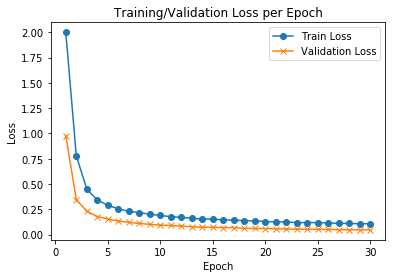

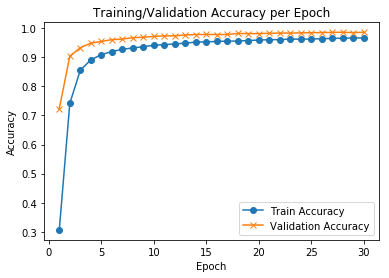

In [6]:
def PlotH(train_value, test_value, yplot):
    f, ax = plt.subplots()
    ax.plot(train_value,'o-')
    ax.plot(test_value, 'x-')
    ax.legend(['Train ' + yplot, 'Validation' + yplot], loc = 0) 
    ax.set_title('Training/Validation ' + yplot+ ' per Epoch')
    ax.set_xlabel('Epoch')
    ax.set_ylabel(yplot)  
    
PlotH(training_history.history['loss'], training_history.history['val_loss'], 'Loss')
PlotH(training_history.history['acc'], training_history.history['val_acc'], 'Accuracy')

In [7]:

filter_size = 5
def LEModel():
    model = Sequential()
    
    model.add(Convolution2D(6, kernel_size=(filter_size, filter_size), activation='relu', kernel_initializer='glorot_uniform',input_shape=(28,28,1)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    
    model.add(Convolution2D(16, kernel_size=(filter_size, filter_size), activation='relu', kernel_initializer='glorot_uniform'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    
    model.add(Dense(120, activation='relu'))

    model.add(Dense(84, activation='relu'))

    model.add(Dense(10, activation='softmax'))
                    
    model.compile(loss=keras.losses.categorical_crossentropy, optimizer='sgd' ,metrics=['accuracy'])
    return model
  
def TrainModel(data=None, epochs=30, batch=32):
    start_time = time.time()
    model = LEModel()
    x_train, x_test, y_train, y_test = data
    history = model.fit(x_train, y_train, nb_epoch=epochs, batch_size=batch,validation_data=(x_test, y_test), verbose=1)
    print("Training took {0} seconds.".format(time.time() - start_time))
    return model, history

In [8]:
trained_model, training_history = TrainModel(data=[x_train, x_test, y_train, y_test])

Start training.


C:\Users\Masoud\Anaconda3\envs\UMC-python2\lib\site-packages\ipykernel_launcher.py:39: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 32s 539us/step - loss: 0.7857 - acc: 0.7392 - val_loss: 0.1738 - val_acc: 0.9517
Epoch 2/30
60000/60000 [==============================] - 35s 589us/step - loss: 0.2480 - acc: 0.9229 - val_loss: 0.1190 - val_acc: 0.9640
Epoch 3/30
60000/60000 [==============================] - 39s 654us/step - loss: 0.1929 - acc: 0.9402 - val_loss: 0.0984 - val_acc: 0.9683
Epoch 4/30
60000/60000 [==============================] - 54s 892us/step - loss: 0.1646 - acc: 0.9479 - val_loss: 0.0843 - val_acc: 0.9717
Epoch 5/30
60000/60000 [==============================] - 68s 1ms/step - loss: 0.1457 - acc: 0.9537 - val_loss: 0.0728 - val_acc: 0.9769
Epoch 6/30
60000/60000 [==============================] - 65s 1ms/step - loss: 0.1334 - acc: 0.9575 - val_loss: 0.0649 - val_acc: 0.9802
Epoch 7/30
60000/60000 [==============================] - 54s 907us/step - loss: 0.1232 - acc: 0.9607 - val_loss: 0.0585

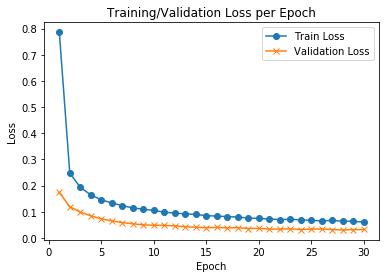

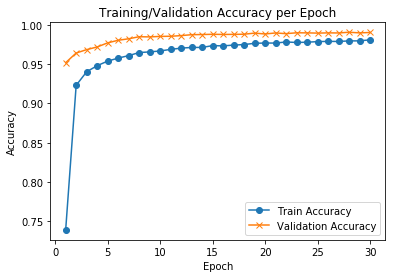

In [9]:
def PlotH(train_value, test_value, yplot):
    f, ax = plt.subplots()
    ax.plot(train_value,'o-')
    ax.plot(test_value, 'x-')
    ax.legend(['Train ' + yplot, 'Validation' + yplot], loc = 0) 
    ax.set_title('Training/Validation ' + yplot+ ' per Epoch')
    ax.set_xlabel('Epoch')
    ax.set_ylabel(yplot)  
    
PlotH(training_history.history['loss'], training_history.history['val_loss'], 'Loss')
PlotH(training_history.history['acc'], training_history.history['val_acc'], 'Accuracy')

In [10]:

filter_size = 5
def LEModel():
    model = Sequential()
    
    model.add(Convolution2D(6, kernel_size=(filter_size, filter_size), activation='relu', kernel_initializer='glorot_uniform',input_shape=(28,28,1)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    
    model.add(Convolution2D(16, kernel_size=(filter_size, filter_size), activation='relu', kernel_initializer='glorot_uniform'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    
    model.add(Dense(120, activation='relu'))

    model.add(Dense(84, activation='relu'))

    model.add(Dense(10, activation='softmax'))
                    
    model.compile(loss=keras.losses.categorical_crossentropy, optimizer='sgd' ,metrics=['accuracy'])
    return model
  
def TrainModel(data=None, epochs=30, batch=16):
    start_time = time.time()
    model = LEModel()
    x_train, x_test, y_train, y_test = data
    history = model.fit(x_train, y_train, nb_epoch=epochs, batch_size=batch,validation_data=(x_test, y_test), verbose=1)
    print("Training took {0} seconds.".format(time.time() - start_time))
    return model, history

In [11]:
trained_model, training_history = TrainModel(data=[x_train, x_test, y_train, y_test])

Start training.


C:\Users\Masoud\Anaconda3\envs\UMC-python2\lib\site-packages\ipykernel_launcher.py:39: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 48s 806us/step - loss: 0.5094 - acc: 0.8327 - val_loss: 0.1244 - val_acc: 0.9615
Epoch 2/30
60000/60000 [==============================] - 59s 978us/step - loss: 0.1890 - acc: 0.9405 - val_loss: 0.0843 - val_acc: 0.9727 1s
Epoch 3/30
60000/60000 [==============================] - 55s 910us/step - loss: 0.1422 - acc: 0.9536 - val_loss: 0.0656 - val_acc: 0.9787
Epoch 4/30
60000/60000 [==============================] - 53s 882us/step - loss: 0.1227 - acc: 0.9606 - val_loss: 0.0603 - val_acc: 0.9809
Epoch 5/30
60000/60000 [==============================] - 59s 979us/step - loss: 0.1070 - acc: 0.9665 - val_loss: 0.0493 - val_acc: 0.9828
Epoch 6/30
60000/60000 [==============================] - 53s 885us/step - loss: 0.0955 - acc: 0.9695 - val_loss: 0.0471 - val_acc: 0.9841
Epoch 7/30
60000/60000 [==============================] - 55s 914us/step - loss: 0.0886 - acc: 0.9716 - val_loss:

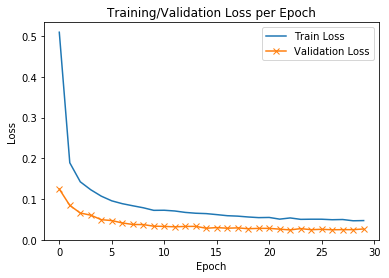

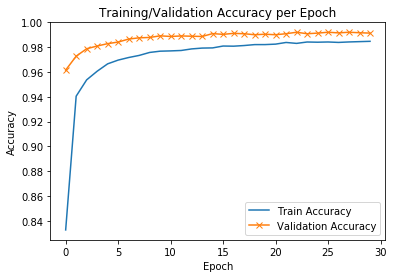

In [18]:
def PlotH(train_value, test_value, yplot):
    f, ax = plt.subplots()
    ax.plot(train_value)
    ax.plot(test_value, 'x-')
    ax.legend(['Train ' + yplot, 'Validation ' + yplot], loc = 0) 
    ax.set_title('Training/Validation ' + yplot+ ' per Epoch')
    ax.set_xlabel('Epoch')
    ax.set_ylabel(yplot)  
    
PlotH(training_history.history['loss'], training_history.history['val_loss'], 'Loss')
PlotH(training_history.history['acc'], training_history.history['val_acc'], 'Accuracy')

In [8]:
filter_size = 5
def LEModel():
    model = Sequential()
    
    model.add(Convolution2D(6, kernel_size=(filter_size, filter_size), activation='relu', kernel_initializer='RandomUniform',input_shape=(28,28,1)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    
    model.add(Convolution2D(16, kernel_size=(filter_size, filter_size), activation='relu', kernel_initializer='RandomUniform'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    
    model.add(Dense(120, activation='relu'))

    model.add(Dense(84, activation='relu'))

    model.add(Dense(10, activation='softmax'))
                    
    model.compile(loss=losses.categorical_crossentropy, optimizer='RMSprop' ,metrics=['accuracy'])
    return model
  
def TrainModel(data, epochs=30, batch=16):
    start_time = time.time()
    model = LEModel()
    x_train, x_test, y_train, y_test = data
    history = model.fit(x_train, y_train, nb_epoch=epochs, batch_size=batch,validation_data=(x_test, y_test), verbose=1)
    print("Training took {0} seconds.".format(time.time() - start_time))
    return model, history

(60000, 28, 28, 1)
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [9]:
trained_model, training_history = TrainModel(data=[x_train, x_test, y_train, y_test])

C:\Users\Masoud\Anaconda3\envs\UMC-python2\lib\site-packages\ipykernel_launcher.py:41: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 42s 698us/step - loss: 0.2541 - acc: 0.9207 - val_loss: 0.0622 - val_acc: 0.9797
Epoch 2/2
60000/60000 [==============================] - 47s 787us/step - loss: 0.1133 - acc: 0.9659 - val_loss: 0.0513 - val_acc: 0.9838
Training took 89.67464685440063 seconds.


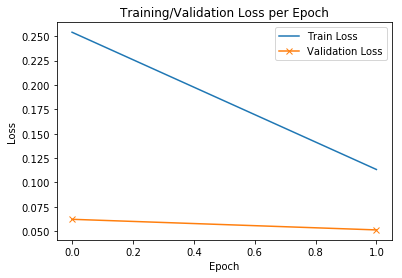

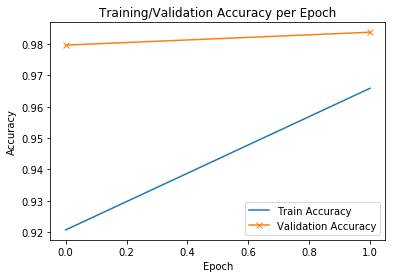

In [10]:
def PlotH(train_value, test_value, yplot):
    f, ax = plt.subplots()
    ax.plot(train_value)
    ax.plot(test_value, 'x-')
    ax.legend(['Train ' + yplot, 'Validation ' + yplot], loc = 0) 
    ax.set_title('Training/Validation ' + yplot+ ' per Epoch')
    ax.set_xlabel('Epoch')
    ax.set_ylabel(yplot)  
    
PlotH(training_history.history['loss'], training_history.history['val_loss'], 'Loss')
PlotH(training_history.history['acc'], training_history.history['val_acc'], 'Accuracy')

In [27]:
###
###part b

In [2]:
def PreprocessDataset():
    (x_train, y_train), (x_test, y_test) = mnist.load_data()
    x_train = x_train.astype('float32')/255
    x_test = 1-x_test.astype('float32')/255
    x_train = x_train.reshape(x_train.shape[0], 28,28,1)
    x_test = x_test.reshape(x_test.shape[0], 28,28,1)
    y_train = np_utils.to_categorical(y_train, 10)
    y_test = np_utils.to_categorical(y_test, 10)
    return [x_train, x_test, y_train, y_test]
x_train, x_test, y_train, y_test = PreprocessDataset()
print(x_train.shape)

filter_size = 5
    
def LEModel():
    model = Sequential()
    
    model.add(Convolution2D(6, kernel_size=(filter_size, filter_size), activation='relu', kernel_initializer='RandomUniform',input_shape=(28,28,1)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    
    model.add(Convolution2D(16, kernel_size=(filter_size, filter_size), activation='relu', kernel_initializer='RandomUniform'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    
    model.add(Dense(120, activation='relu'))

    model.add(Dense(84, activation='relu'))

    model.add(Dense(10, activation='softmax'))
                    
    model.compile(loss=losses.categorical_crossentropy, optimizer='Adagrad' ,metrics=['accuracy'])
    return model
  
def TrainModel(data, epochs=30, batch=8):
    start_time = time.time()
    model = LEModel()
    x_train, x_test, y_train, y_test = data
    history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch,validation_data=(x_test, y_test), verbose=1)
    print("Training took {0} seconds.".format(time.time() - start_time))
    return model, history


(60000, 28, 28, 1)
(60000, 28, 28, 1)
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [23]:
trained_model, training_history = TrainModel(data=[x_train, x_test, y_train, y_test])

C:\Users\Masoud\Anaconda3\envs\UMC-python2\lib\site-packages\ipykernel_launcher.py:41: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 46s 762us/step - loss: 0.2398 - acc: 0.9229 - val_loss: 2.6841 - val_acc: 0.2256
Epoch 2/30
60000/60000 [==============================] - 53s 879us/step - loss: 0.1422 - acc: 0.9547 - val_loss: 2.3270 - val_acc: 0.2589
Epoch 3/30
60000/60000 [==============================] - 75s 1ms/step - loss: 0.1215 - acc: 0.9629 - val_loss: 2.3704 - val_acc: 0.2603
Epoch 4/30
60000/60000 [==============================] - 76s 1ms/step - loss: 0.1143 - acc: 0.9644 - val_loss: 2.3620 - val_acc: 0.2425
Epoch 5/30
60000/60000 [==============================] - 65s 1ms/step - loss: 0.1049 - acc: 0.9667 - val_loss: 2.2508 - val_acc: 0.2967
Epoch 6/30
60000/60000 [==============================] - 64s 1ms/step - loss: 0.0974 - acc: 0.9694 - val_loss: 2.2951 - val_acc: 0.2738
Epoch 7/30
60000/60000 [==============================] - 64s 1ms/step - loss: 0.0946 - acc: 0.9698 - val_loss: 2.2928 - val

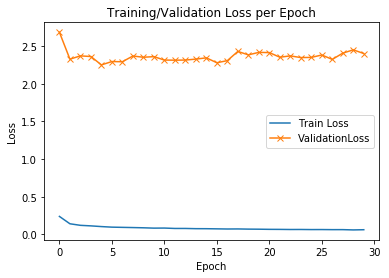

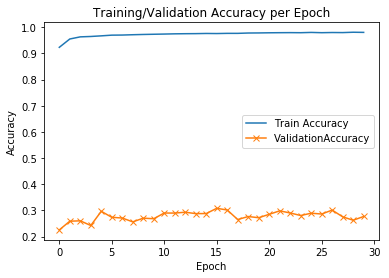

In [28]:
def PlotH(train_value, test_value, yplot):
    f, ax = plt.subplots()
    ax.plot(train_value)
    ax.plot(test_value, 'x-')
    ax.legend(['Train ' + yplot, 'Validation' + yplot], loc = 0) 
    ax.set_title('Training/Validation ' + yplot+ ' per Epoch')
    ax.set_xlabel('Epoch')
    ax.set_ylabel(yplot)  
    
PlotH(training_history.history['loss'], training_history.history['val_loss'], 'Loss')
PlotH(training_history.history['acc'], training_history.history['val_acc'], 'Accuracy')

In [4]:
filter_size = 5
def PreprocessDataset():
    (x_train, y_train), (x_test, y_test) = mnist.load_data()
    x_train = x_train.astype('float32')/255
    x_test = 1-x_test.astype('float32')/255
    x_train = np.concatenate((x_train, 1-x_train), axis=0)
    x_train = x_train.reshape(x_train.shape[0], 28,28,1)
    x_test = x_test.reshape(x_test.shape[0], 28,28,1)
    y_train = np_utils.to_categorical(y_train, 10)
    y_train = np.concatenate((y_train, y_train), axis=0)
    y_test = np_utils.to_categorical(y_test, 10)
    return [x_train, x_test, y_train, y_test]
x_train, x_test, y_train, y_test = PreprocessDataset()
print(x_train.shape)

def LEModel():
    model = Sequential()
    
    model.add(Convolution2D(6, kernel_size=(filter_size, filter_size), activation='relu', kernel_initializer='RandomUniform',input_shape=(28,28,1)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    
    model.add(Convolution2D(16, kernel_size=(filter_size, filter_size), activation='relu', kernel_initializer='RandomUniform'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    
    model.add(Dense(120, activation='relu'))

    model.add(Dense(84, activation='relu'))

    model.add(Dense(10, activation='softmax'))
                    
    model.compile(loss=losses.categorical_crossentropy, optimizer='adagrad' ,metrics=['accuracy'])
    return model
  
def TrainModel(data, epochs=30, batch=32):
    start_time = time.time()
    model = LEModel()
    x_train, x_test, y_train, y_test = data
    history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch,validation_data=(x_test, y_test), verbose=1,shuffle=True)
    print("Training took {0} seconds.".format(time.time() - start_time))
    return model, history

(120000, 28, 28, 1)


In [5]:
trained_model, training_history = TrainModel(data=[x_train, x_test, y_train, y_test])

Train on 120000 samples, validate on 10000 samples
Epoch 1/30
120000/120000 [==============================] - 96s 798us/step - loss: 0.2699 - acc: 0.9119 - val_loss: 0.0866 - val_acc: 0.9733
Epoch 2/30
120000/120000 [==============================] - 96s 799us/step - loss: 0.1568 - acc: 0.9499 - val_loss: 0.0689 - val_acc: 0.9780
Epoch 3/30
120000/120000 [==============================] - 98s 817us/step - loss: 0.1355 - acc: 0.9567 - val_loss: 0.0593 - val_acc: 0.9817
Epoch 4/30
120000/120000 [==============================] - 100s 831us/step - loss: 0.1228 - acc: 0.9607 - val_loss: 0.0524 - val_acc: 0.9828
Epoch 5/30
120000/120000 [==============================] - 100s 836us/step - loss: 0.1143 - acc: 0.9639 - val_loss: 0.0510 - val_acc: 0.9836
Epoch 6/30
120000/120000 [==============================] - 112s 931us/step - loss: 0.1080 - acc: 0.9657 - val_loss: 0.0468 - val_acc: 0.9845
Epoch 7/30
120000/120000 [==============================] - 107s 894us/step - loss: 0.1030 - acc: 0.

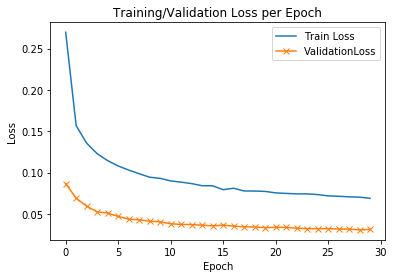

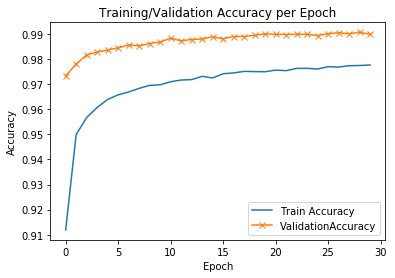

In [9]:
def PlotH(train_value, test_value, yplot):
    f, ax = plt.subplots()
    ax.plot(train_value)
    ax.plot(test_value, 'x-')
    ax.legend(['Train ' + yplot, 'Validation' + yplot], loc = 0) 
    ax.set_title('Training/Validation ' + yplot+ ' per Epoch')
    ax.set_xlabel('Epoch')
    ax.set_ylabel(yplot)  
    
PlotH(training_history.history['loss'], training_history.history['val_loss'], 'Loss')
PlotH(training_history.history['acc'], training_history.history['val_acc'], 'Accuracy')

In [10]:
filter_size = 5
def PreprocessDataset():
    (x_train, y_train), (x_test, y_test) = mnist.load_data()
    x_train = x_train.astype('float32')/255
    x_test = x_test.astype('float32')/255
    x_train = np.concatenate((x_train, 1-x_train), axis=0)
    x_train = x_train.reshape(x_train.shape[0], 28,28,1)
    x_test = x_test.reshape(x_test.shape[0], 28,28,1)
    y_train = np_utils.to_categorical(y_train, 10)
    y_train = np.concatenate((y_train, y_train), axis=0)
    y_test = np_utils.to_categorical(y_test, 10)
    return [x_train, x_test, y_train, y_test]
x_train, x_test, y_train, y_test = PreprocessDataset()
print(x_train.shape)

def LEModel():
    model = Sequential()
    
    model.add(Convolution2D(6, kernel_size=(filter_size, filter_size), activation='relu', kernel_initializer='RandomUniform',input_shape=(28,28,1)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    
    model.add(Convolution2D(16, kernel_size=(filter_size, filter_size), activation='relu', kernel_initializer='RandomUniform'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    
    model.add(Dense(120, activation='relu'))

    model.add(Dense(84, activation='relu'))

    model.add(Dense(10, activation='softmax'))
                    
    model.compile(loss=losses.categorical_crossentropy, optimizer='adagrad' ,metrics=['accuracy'])
    return model
  
def TrainModel(data, epochs=30, batch=32):
    start_time = time.time()
    model = LEModel()
    x_train, x_test, y_train, y_test = data
    history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch,validation_data=(x_test, y_test), verbose=1,shuffle=True)
    print("Training took {0} seconds.".format(time.time() - start_time))
    return model, history

(120000, 28, 28, 1)


In [11]:
trained_model, training_history = TrainModel(data=[x_train, x_test, y_train, y_test])

Train on 120000 samples, validate on 10000 samples
Epoch 1/30
120000/120000 [==============================] - 61s 508us/step - loss: 0.2847 - acc: 0.9068 - val_loss: 0.0929 - val_acc: 0.9716
Epoch 2/30
120000/120000 [==============================] - 67s 555us/step - loss: 0.1648 - acc: 0.9474 - val_loss: 0.0748 - val_acc: 0.9772
Epoch 3/30
120000/120000 [==============================] - 75s 624us/step - loss: 0.1419 - acc: 0.9552 - val_loss: 0.0659 - val_acc: 0.9800
Epoch 4/30
120000/120000 [==============================] - 81s 674us/step - loss: 0.1281 - acc: 0.9595 - val_loss: 0.0593 - val_acc: 0.9813
Epoch 5/30
120000/120000 [==============================] - 103s 862us/step - loss: 0.1186 - acc: 0.9623 - val_loss: 0.0559 - val_acc: 0.9827
Epoch 6/30
120000/120000 [==============================] - 119s 992us/step - loss: 0.1130 - acc: 0.9643 - val_loss: 0.0514 - val_acc: 0.9845
Epoch 7/30
120000/120000 [==============================] - 89s 739us/step - loss: 0.1086 - acc: 0.96

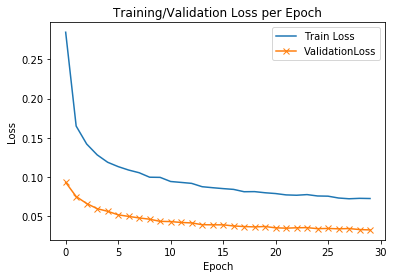

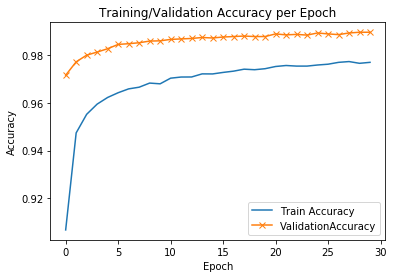

In [12]:
def PlotH(train_value, test_value, yplot):
    f, ax = plt.subplots()
    ax.plot(train_value)
    ax.plot(test_value, 'x-')
    ax.legend(['Train ' + yplot, 'Validation' + yplot], loc = 0) 
    ax.set_title('Training/Validation ' + yplot+ ' per Epoch')
    ax.set_xlabel('Epoch')
    ax.set_ylabel(yplot)  
    
PlotH(training_history.history['loss'], training_history.history['val_loss'], 'Loss')
PlotH(training_history.history['acc'], training_history.history['val_acc'], 'Accuracy')